# IS-MP-PCモデル

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

In [1]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import eigvals, inv

## はじめに

この章では，ケインズ的なマクロ経済理論の流れをくむ動学的マクロ経済モデルを考える。ここではIS-MP-PCモデルと呼ぶことにする。中心となるメカニズムは価格粘着性だが，なぜ粘着性が発生するかは所与としてIS-MP-PCモデルの動学的な特徴を中心に議論する。典型的なAD-ASモデルが単純に動学的（時間の概念の明示的な導入）になったのではなく，根本的な違いが存在する。IS-MP-PCモデルの特徴としては次の点を挙げることができる。

伝統的なIS-LMモデルではIS曲線が財市場の均衡を表し，LM曲線が貨幣市場の均衡を特徴付け、この２つの曲線から総需要曲線が導出される。本章は、この枠組みから離れより現実的なマクロ・モデルを考察することによりマクロ経済の短期的な均衡を考察することになる。LM曲線は中央銀行がマネー・ストックを調整し金融政策を実施すると仮定するが，現実的とは言えない。実際には，中央銀行は利子率を調整しインフレ率をコントロールする。それを捉えたのが，後述するテイラー・ルールであり，モデルの中ではMP曲線として表される。中央銀行によって設定された利子率に基づいて貨幣市場での均衡が成立し，マクロ変数（インフレ率や産出量）が決定されると考える方がより現実的である。

以下ではIS-MP-PCモデルを使い，政策変更を含む様々なショックの動学的な効果を検討する。あるショックが発生するとマクロ変数は少しずつ調整し，お互いに影響し合いつつ経済は長期均衡へと移行することになるが，その過程をシミュレーションを通して考える。特に，インパルス反応と呼ばれる手法を用いてショックのダイナミックな効果を明らかにする。更に，その効果は中央銀行の政策スタンスによって違ってくることも明らかにする。

＜**記号リスト**＞

* $y_t$：産出
* $y^*$：自然産出水準（長期的産出）
* $i_t$：名目利子率
* $r_t$：実質利子率
* $r^*$：自然実質利子率（長期的産出に対応する実質利子率）
* $\pi_t$：インフレ率
* $\text{E}_t\pi_{t+1}$：$t$期に形成された$t+1$期の期待インフレ率
* $\pi^*$：自然インフレ率（長期的産出に対応するインフレ率）
    * モデルの中では中央銀行のターゲット・インフレ率と解釈可能

## IS-MP-PCモデル：単純なケース

(sec:12-simple)=
## IS-MP-PCモデル：単純なケース

### 説明

単純なケースから始める。このケースでは重要な要素が欠落しており，均衡も現実的だとは言えない。目的は何かというと，第一にモデルの基本的なメカニズムを理解することである。後に欠落した要素を導入し充実化したモデルを検討するが，より複雑なものとなる。単純なケースを使いモデルの基本的な動きを理解することが一つ目の目的である。第二に，単純なケースと比較すると，充実化したモデルは動学的な特徴がより現実に近いリッチな動きとなる。その差自体が欠落していた要素の効果として考えることができる。従って，単純なケースは後のより現実に近いモデルを理解するためのベンチマークとして考えることができる。

IS-MP-PCモデルは次の５つの式で構成される。最終的には，２つの内生変数（インフレ率と産出量）が決定される２つの均衡式を導出することになる。

**＜フィッシャー方程式＞**

$$
r_t = i_t-\text{E}_t\pi_{t+1}
$$ (eq:12-fisher)

* $i_t$：$t$期から$t+1$期にかけての名目利子率
    * $t$期に確定されている。
* $\text{E}_t\pi_{t+1}$：期待インフレ率
    * $\pi_{t+1}$は$t$期から$t+1$期にかけての一般物価水準の変化率であり，$t$期にその変化は分からない。
    * $\text{E}_t$は$t$期に形成される将来の期待。
* $r_t$：$t$期から$t+1$期にかけての実質利子率
    * $\pi_{t+1}$が確定されていないため$t$期には分からない。
* $t$期に利子率$i_t$の社債を購入し，$t+1$期に$i_t$に基づいて利息が支払われるとすると，$t$期に評価する実質利子率はフィッシャー方程式[](eq:12-fisher)で与えられる。

**＜IS曲線＞**

$$
y_t=y^*-a(r_t-r^*)+u_t
$$ (eq:12-is)

* 財市場の均衡条件であり，IS-LMモデルのIS曲線である。ここでは簡単な形で表現され，産出は実質利子率に依存している。
* $a>0$は次の関係を捉えている。
    * $r\uparrow\;\Rightarrow\;\text{投資}\downarrow\;\Rightarrow\;y\downarrow$
* $u_t$：需要ショック
    * 平均ゼロ，分散一定のホワイト・ノイズ
    * 例：
        * コロナ感染症による消費や投資の減少
        * 政府支出の変化

**＜金融政策（MP）曲線＞**

$$
i_t=r^*+\pi_t+v_t
$$ (eq:12-mp_simple)

* **M**onetary **P**olicyの頭文字MPをとってMP曲線と呼ばれる。
* 中央銀行が名目利子率を設定するが，あるルールに基づいて金融政策（Monetary Policy）を決定すると考える。そのルールを捉えるのがMP曲線である。しかし単純なケースとして，ここではインフレ・ターゲットではなく、自然実質利子率に単純にインフレ率を上乗せするルールを仮定する。この部分に有用な要素が欠落していることになる。後により現実的な金融政策ルールを導入する。
* 貨幣市場では，決定された利子率を成立させるためにマネーストックが調整される。
* $v_t$：金融政策ショック
    * 平均ゼロ、分散一定のホワイト・ノイズ
    * 例えば、事前通告なしの政策の変更

**＜フィリップス曲線＞**

$$
\pi_t=\text{E}_{t-1}\pi_t+b(y_t-y^*)+e_t
$$ (eq:12-pc)

* 失業とインフレ率の負の関係を示す。失業と産出には負の関係があるので、それを使い書き換えている。
* インフレ率は産出（失業率）に依存する（関数である）。
* $b>0$は次の関係を捉えている。
    * $y\uparrow\;\Rightarrow\;\text{失業}\downarrow\;\Rightarrow\;\pi\uparrow$
* $e_t$：インフレ率に対するショック
    * 平均ゼロ、分散一定のホワイト・ノイズ
    * 例えば、期待インフレ率の変化、生産性の上昇

**＜適応的期待＞**

$$
\text{E}_t\pi_{t+1}=\pi_{t}
$$ (eq:12-ae)

* 将来のインフレ率は平均で今期のインフレ率と等しい。
* 後ろ向きの期待形成となる。

### モデルの解

式[](eq:12-fisher)、[](eq:12-is)、[](eq:12-mp_simple)、[](eq:12-ae)を使うと次の式を導出できる。

$$
y_t=y^*+u_t-av_t\quad\text{(ISMP)}
$$

名前から分かるように，IS曲線とMP曲線が重要なメカニズムとなる均衡式である。財・サービスの需要サイドの均衡を捉えているので，その役割を動学的総需要曲線（Dynamic Aggregate Demand curve）と理解して良いだろう。$u_t=v_t=0$とすると{numref}`fig:12-ismppc_simple`の中で垂直となる。直感的には，実質利子率は自然利子率と等しくなり，ショック項が0であるかぎり産出が自然産出水準から乖離する要因がないためであり，総需要はインフレ率から独立になる。

次に式[](eq:12-ae)と[](eq:12-pc)を使うと次式を得る。
    
$$
\pi_t=\pi_{t-1}+b(y_t-y^*)+e_t\quad\text{(PC)}
$$

適応的期待が組み込まれたフィリップス曲線であり，この均衡式をPC曲線と呼ぶ（混乱を避けるために以下では式[](eq:12-pc)は番号もしくはカタカナで「フィリップス曲線」と呼ぶことにする）。財・サービスの供給サイドの均衡を捉えているので，動学的供給曲線（Dynamic Aggregate Supply curve）と理解すれば良いだろう。$e_t=0$とし$\pi_{t-1}$を所与（は一定）とすると{numref}`fig:12-ismppc_simple`の中で右上がりなる。直感的には，PC曲線の影響であり，産出が自然水準を上回るとインフレ率が上昇するためである。

通常のAD-ASモデルでは縦軸に一般物価水準がくる。一方で{numref}`fig:12-ismppc_simple`から分かるように，IS-MP-PCモデルではインフレ率が縦軸にあることに注意しよう。

均衡では，$u_t\ne 0$，$v_t\ne 0$，$e_t\ne 0$であったとしても，$\pi_{t-1}$を所与としてこの２式で$(y_t,\pi_t)$が決定されることになる。更に$t+1$期では，$u_{t+1}$，$v_{t+1}$，$e_{t+1}$はそれぞれの$t$期とは異なる値をとるかもしれないが，それらと一緒に$t$期に決定された$\pi_{t}$を所与として$(y_{t+1},\pi_{t+1})$が決定されることになる。このように内生変数の値が逐次的に決まることになるが，まさにこのような逐次的関係を捉えるのが[「差分方程式と経済分析」](chap:7-differenceEq)の章で説明した差分方程式である。

```{figure} /images/ismppc_simple.jpeg
---
scale: 30%
name: fig:12-ismppc_simple
---
IS-MP-PCモデルの単純なケース
```

均衡を差分方程式で表すために，式(ISMP)を式(PC)に代入し１期進めよう。

$$
\pi_{t+1}
=\pi_{t}
+b(u_{t+1}-av_{t+1})+e_{t+1}
$$ (eq:12-pi_deqn_simple)

この式を理解するために，$u_t=v_t=e_t=0$と置いてみると次式となる。

$$
\pi_{t+1}=\pi_{t}
$$ (eq:12-pi_deqn_simple_no_shock)

$t+1$期のインフレ率は$t$期のインフレ率と等しいことを示しており，今期のインフレ率は変わらず来期にも続くことを示している。換言すると，
初期時点からショックが無い場合，初期のインフレ率$\pi_0$が持続するという意味である。これはインフレ率のデータの特徴であるpersistenceを捉えていると解釈できる。

まとめると，$u_t=v_t=e_t=0$の場合，式(ISMP)と式[](eq:12-pi_deqn_simple_no_shock)から
* $y_t=y^*$
* $\pi_t=\pi_0=\pi^*$

となり，この均衡が持続されることになる。

### シミュレーション：インパルス反応

#### 準備

１期間を四半期と考え，ショックの効果を考える。$u_t$，$v_t$，$e_t$の内１つのショック（ゼロでない値）が１期だけ発生し，その結果内生変数がどのように変化するかを考えよう。インパルス反応と呼ばれる手法である。

次の値を仮定する。

＜定常状態の値＞
* $y^*=100$
    * 自然産出水準からの乖離（$y_t-y^*$）は％として解釈できる。
* $\pi^*=2$
    * 目標インフレ率
* $r^*=2$
    * 自然実質利子率

＜パラメータのデフォルト値＞
* $a=1$
    * IS曲線のパラメータ
    * 実質利子率の1％上昇は需要を1%減少させる。
* $b=0.25$
    * PC曲線のパラメータ
    * 産出量が自然率水準を1％上回るとインフレ率は0.25％ポイント上昇する。
    
まずインパルス反応分析用の関数を作成する。

In [18]:
def ismppc_model_simple(pi0, a=1, b=0.25, shock_is=0, shock_mp=0, shock_pc=0, n=3):
    """引数：
            pi0：初期のインフレ率
            a：IS曲線のパラメータ（利子率の乖離）
            b：フィリップス曲線のパラメータ（GDPギャップ）
            shock_is：IS曲線のショック
            shock_mp：MP曲線のショック
            shock_pc：フィリップス曲線のショック
            n：ショック発生後の計算回数
       返り値：
           インフレ率，名目利子率，産出量，MP・IS・フィリップス曲線へのショックからなるDataFrame
           
       * ショックは３期目に発生する"""
    
    # ========== 初期の値 ==========
    pi = pi0                  # 初期のインフレ
     
    # ========== 長期均衡での値 ==========
    y_ss = 100                # 産出量の定常値
    r_ss = 2                  # 実質利子率の定常値

    # ========== 結果を格納するリストの作成 ==========
    pi_list = [pi]*3          # インフレ率
    y_list = [y_ss]*3         # 産出量
    i_list = [pi+r_ss]*3      # 名目利子率
    shock_is_list = [0]*3     # IS曲線のショック
    shock_mp_list = [0]*3     # MP曲線のショック
    shock_pc_list = [0]*3     # フィリップス曲線のショック

    # ========== ショック発生時 ==========
    pi = pi + b*(shock_is-a*shock_mp) + shock_pc # PC曲線
    y = y_ss + shock_is - a*shock_mp             # ISMP曲線
    i = r_ss + pi + shock_mp                     # MP曲線
    
    pi_list.append(pi)
    y_list.append(y)
    i_list.append(i)
    shock_is_list.append(shock_is)
    shock_mp_list.append(shock_mp)
    shock_pc_list.append(shock_pc)

    # ========== ショック発生後 ==========
    for i in range(n):
        
        shock_is = 0
        shock_mp = 0
        shock_pc = 0
        
        pi = pi
        y = y_ss
        i = r_ss + pi
        
        pi_list.append(pi)
        y_list.append(y)
        i_list.append(i)
        shock_is_list.append(shock_is)
        shock_mp_list.append(shock_mp)
        shock_pc_list.append(shock_pc)

    # ========== DataFrameの作成 ==========
    dic = {'インフレ率':pi_list,
           'MP曲線ショック':shock_mp_list,
           '名目利子率':i_list,
           'IS曲線ショック':shock_is_list,
           '産出量':y_list,
           'フィリップス曲線ショック':shock_pc_list,}
    df = pd.DataFrame(dic)

    return df

#### フィリップス曲線のショック

$t=0$を初期と考えて$t=3$の時に$e_t=1$となり、それ以外では$e_t=0$と仮定して、変数の推移を計算しよう。

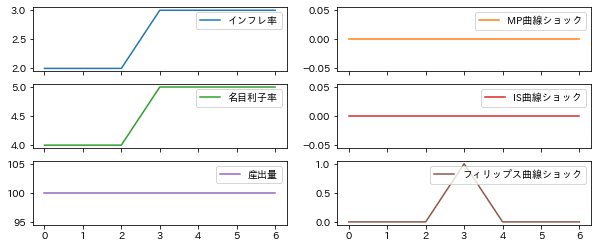

In [8]:
df_inf = ismppc_model_simple(pi0=2, shock_pc=1)
df_inf.plot(subplots=True, layout=(3,2), figsize=(10,4))
pass

右３つの図からフィリップス曲線のショックが１単位上昇（例えば，オイルショックや生産費用を増加させるショック）し，他のショックは動いていないことが分かる。左３つの図にある内生変数の動きを考えるために，ISMP曲線とPC曲線を{numref}`fig:12-pc_shock_simple`に図示してみよう。
* $t=2$期まで：
    * 経済は点Aにある。
* $t=3$期：
    * ショックが発生しPC曲線は上方シフト（①）する。それに伴ってインフレ率が上昇している。名目利子率も上昇しているが，MP曲線を通して発生している。即ち，インフレ率の上昇に**反応して**中央銀行は名目利子率を上げている。一方で産出量は一定である。これはISMP曲線は垂直で影響を受けていないためである。
* $t=4$期以降：
    * ショックはゼロに戻る。しかし$\pi_3$が高かったので$\pi_4$も高止まりの状態が続く。それを受けて中央銀行は名目利子率も高い水準を維持することになる。
    * ここで注意する点は，ショックが発生した$t=3$期に全ての動きは完了しており，$t=3$期以降は新たな定常状態にジャンプしている。

```{figure} /images/pc_shock_simple.jpeg
---
scale: 30%
name: fig:12-pc_shock_simple
---
単純なケース：PC曲線へのショックの効果
```

#### IS曲線のショック

$t=0$を初期と考えて$t=3$の時に$u_t=1$となり、それ以外では$u_t=0$と仮定して、変数の推移を計算しよう。

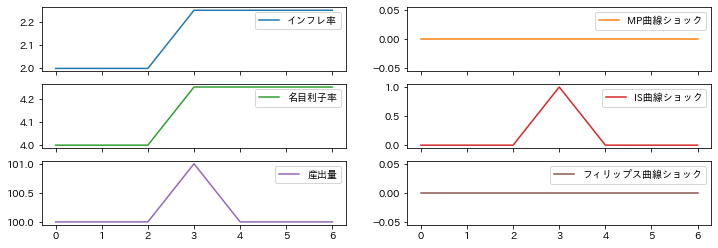

In [34]:
df_inf = ismppc_model_simple(pi0=2, shock_is=1)
df_inf.plot(subplots=True, layout=(3,2), figsize=(12,4))
pass

右３つの図からIS曲線だけにショックが発生していることが分かる。ISショックは符号は正であり，引き起こす要因の例として政府支出の増加や減税，将来を楽観視する投資家の増加などがあげられる。{numref}`fig:12-is_shock_simple`を使い内生変数の動きを考えてみよう。初期時点の均衡は点Aであり，ここからスタートする。
* $t=2$期まで：
    * 経済は点Aにある。
* $t=3$期：
    * ショックが発生しISMP曲線は右にシフトする（①）。総需要増加と考えれば良いだろう。その結果，産出は増加し自然率水準からの乖離（$y_t-y^*$）が発生するため，経済は点AからPC曲線に沿ってBに移行する。インフレ率が上昇に**反応して**，中央銀行は名目利子率を上昇させることになる。
* $t=4$期:
    * ISショックはゼロに戻り，ISMP曲線も元に位置に戻る（②）。産出の自然率水準からの乖離はなくなる。しかし$\pi_3$のインフレが上昇したため，PC曲線は上方シフトする（③）。点Cが均衡となり，$\pi_3$の水準は維持されたままとなる。また$\pi_3=\pi_4$となっているので，中央銀行も高い名目利子率を維持し続けることになる。
* $t=5$期以降：
    * $t=4$期の状態が定常状態であり，その状態が続く。

```{figure} /images/is_shock_simple.jpeg
---
scale: 30%
name: fig:12-is_shock_simple
---
単純なケース：IS曲線へのショックの効果
```

#### MP曲線のショック

$t=0$を初期と考えて$t=3$の時に$v_t=1$となり、それ以外では$v_t=0$と仮定して、変数の推移を計算する。

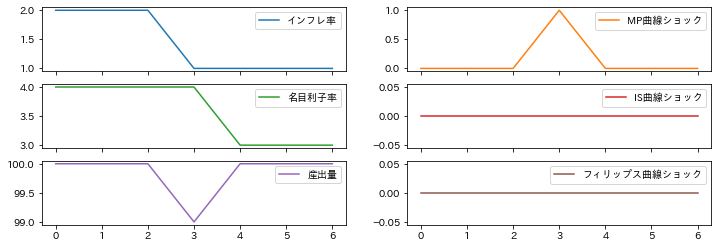

In [33]:
df_inf = ismppc_model_simple(2,a=1,b=1, shock_mp=1)
df_inf.plot(subplots=True, layout=(3,2), figsize=(12,4))
pass

MP曲線の正のショックのみが発生している。何らかの理由（例えば，レアマテリアルなどの輸入財の高騰に直面してインフレのプレッシャーが高まった）で日銀は事前通告なしで名目利子率を上昇させたケースである。
* $t=2$期まで：
    * 経済は点Aにいる。
* $t=3$期：
    * ショックが発生する。フィシャー方程式と適応的期待から実質利子率は次式で与えられる。
    
        $$
        r_3 = i_3-\pi_{3}
        $$
    　
     従って，実質利子率は増加することになり，投資が影響しISMP曲線は左シフト（①）し産出が減少する。産出は自然率水準を下回り，経済はPC曲線に沿って点Bに移行する。それに伴いインフレ率は下落する（$\pi_2>\pi_3$）
* $t=4$期：
    * MP曲線のショックはなくなり，DAD曲線は元に位置に戻る（②）。しかし$\pi_3$は下落したため，IS曲線は下方シフト（③）し，経済は点Cに移行する。インフレ率は低いままなので，中央銀行も低い名目利子率を維持したままとなる。
* $t=5$期以降：
    * $t=4$期の状態が定常状態であり，その状態が続く。

```{figure} /images/mp_shock_simple.jpeg
---
scale: 30%
name: fig:12-mp_shock_simple
---
単純なケース：MP曲線へのショックの効果
```

## IS-MP-PCモデル：MP曲線の充実化

### 説明

* フィッシャー方程式，IS曲線，フィリップス曲線は同じ。
* MP曲線（Monetary Policy Rule）は中央銀行が名目利子率を決めるルールだが，より現実的な仮定を導入する。中央銀行は，目標とするインフレ率があり，産出量にもターゲット水準がある。ターゲット・インフレ率は$\pi^*$とし，産出量の目標は自然水準$y^*$とする。中央銀行は２つの目的を達成するために唯一の「武器」である名目利子率を調整する。具体的には次のMP曲線を仮定する。

    $$
    i_t=r^*+\pi_t+c(\pi_t-\pi^*)+d(y_t-y^*)+v_t
    $$ (eq:12-mp)
    

    * $c>0$：中央銀行はターゲット・インフレ率からの乖離にどれだけ反応するかを捉える。
    * $d>0$：中央銀行は産出の自然率水準からの乖離にどれだけ反応するかを捉える。
        * $(y_t-y^*)$はGDPギャップとも呼ばれる。
    * 以下で説明するが，このMP曲線はテイラー・ルールとして知られており，数十年間の中央銀行の金融政策を捉えていると広く考えられている。
    * 貨幣市場では、決定された利子率を成立させるためにマネーストックが調整される。

### 安定性

まず安定性から考えることにする。フィッシャー方程式[](eq:12-fisher)，IS曲線[](eq:12-is)，MP曲線[](eq:12-mp)を使うと次の動学的需要曲線が導出できる。

$$
y_{t}=y^* +
    \frac{1}{1+ad}
    \left\{
        ac(\pi^*-\pi_{t})
        +u_{t}-av_{t}
    \right\}
    \qquad\text{(ISMP)}
$$

$c=d=0$の場合，単純なケースのISMP曲線を同じになることが確認できる。もう１つの均衡式には上で導出したPC曲線を使う。

$$
\pi_t=\pi_{t-1}+b(y_t-y^*)+e_t\qquad\text{(PC)}
$$

これにより、$(\pi_{t-1},u_t,v_t,e_t)$を所与として$y_t$と$\pi_t$はISMP曲線とPC曲線によって決定される。{numref}`fig:12-ismppc`ではDAD曲線は右下がりとなり，より現実的な総需要曲線となっている。

```{figure} /images/ismppc.jpeg
---
scale: 30%
name: fig:12-ismppc
---
IS-MP-PCモデル
```

更にこの連立方程式を解くと次式を示すことができる。

$$
\pi_{t+1} =
\phi_0\pi^* + \phi_1\pi_{t} + \eta_{t+1}
$$ (eq:12-pi_deqn)

ここで

$$
\phi_0\equiv
\frac{abc}{1+ad},
\qquad
\phi_1\equiv
\dfrac{1+ad}{1+abc+ad},
\qquad
\eta_{t+1}\equiv \frac{b(u_{t+1}-av_{t+1})+(1+ad)e_{t+1}}{1+a(bc+d)}
$$

式[](eq:12-pi_deqn)はインフレ率のダイナミックを示す差分方程式である。式[](eq:12-pi_deqn)から次の結果は明らかである。
* $\phi_1<1$：収束（安定的）
* $\phi_1=1$：収束・発散もせず「同じ」値にとどまる

ではパラメータがどのような値の場合に収束するのだろうか。$c$と$d$の値に基づいて表にある４つのケースに分けることができる。

|        | $d＞０$       | $d＝０$     |
|--------|--------------|-------------|
| $c＞０$ | $\phi_1＜１$ | $\phi_1＜１$ |
| $c＝０$ | $\phi_1＝１$ | $\phi_1＝１$ |

この表から$c>0$は$\phi_1<1$の必要条件であり，$c=0$の場合は必ず$\phi_1=1$になることが分かる。即ち、インフレ率をコントロールするためには$c>0$は必須である。この含意について考えるためにMP曲線[](eq:12-mp)を$\pi_t$で微分してみよう。

$$
\frac{\partial i_t}{\partial\pi_t}=1+c
$$

この結果は次のことを意味する。
> インフレを制御するためには（即ち、$c>0$），中央銀行はインフレ率の上昇以上に名目利子率を上昇させる必要がある。

これは**＜テーラー原則＞**と呼ばれる。直感的には次のように理解できる。外生的な理由で需要が増加しインフレ率が上昇したとしよう。もし中央銀行が名目利子率を十分に上昇させなければ，実質利子率は減少することになる。これにより需要はさらに増加することになり，インフレ率のさらなる上昇につながってしまう。これを避けるためには、実質利子率を上昇させる必要があり，そのためにはインフレ率の上昇よりも大きな名目利子率の上昇が必要となる。

[簡単なケース](sec:12-simple)を思い出そう。インパルス反応分析では，一度変化（上昇・下落）したインフレ率はそのまま持続された。この結果はまさしく$c=0$が仮定され$\phi_1=1$となっていたためである。中央銀行の目的はインフレ率の安定化である。$c>0$の仮定があってこそ，現実の中央銀行の行動を捉えることができるのである。

### 行列を使った計算

上で求めたISMP曲線とPC曲線を再掲する。

$$
\begin{align*}
y_{t+1}&=y^* +
    \frac{1}{1+ad}
    \left\{
        a(c-1)\pi^*
        -ac\pi_{t+1}
        +a\pi_t
        +u_{t+1}-av_{t+1}
    \right\}
    \qquad\text{(ISMP)} \\
\pi_{t+1}&=\pi_t+b(y_{t+1}-y^*)+e_{t+1}
\qquad\qquad\qquad\qquad\qquad\qquad
\text{(PC)}
\end{align*}
$$

（ISMP）と（PC）を次のように行列を使い書き換えよう。

$$
\begin{align*}
    \gamma y_{t+1} + ac\pi_{t+1} &= \gamma y^*+ac\pi^*+u_{t+1}-av_{t+1} \\
    -by_{t+1}+\pi_{t+1}&=\pi_t-by^*+e_{t+1}
\end{align*}
$$

ここで $\gamma\equiv 1+ad$。

$$\Downarrow$$

$$
\begin{align}
    AX_{t+1}&=BX_t+C_{t+1} \\[7mm]
    X_{t+1}=
    \begin{bmatrix}
        y_{t+1} \\
        \pi_{t+1}
    \end{bmatrix}
    ,\quad
    A&=
    \begin{bmatrix}
        \gamma  &  ac \\
        -b &  1
    \end{bmatrix}
    ,\quad
    B=
    \begin{bmatrix}
        0 & 0 \\
        0 & 1
    \end{bmatrix}
    \\[2mm]
    C_{t+1}&=
    \begin{bmatrix}
       \gamma y^*+ac\pi^* + u_{t+1}-av_{t+1} \\
       -by^*+e_{t+1}
    \end{bmatrix}
\end{align}
$$

$X_{t+1}$で解くと次のようになる。

$$
X_{t+1}=A^{-1}BX_t+A^{-1}C_{t+1}
$$

ここで$A^{-1}$は$A$の逆行列。この式を使って，$X_t$と$C_{t+1}$を所与として$X_{t+1}$を計算し，$y_{t+1}$と$\pi_{t+1}$を求めることができる。

````{admonition} 興味がある人のみ参考にしてください。
:class: tip
        
`SymPy`を使うと，固有値を記号だけを使い計算することが可能である。
```
import sympy as sy
a,b,c,d, lam = sy.symbols('a b c d lam')

AA = sy.Matrix([[1+a*d,a*c],[-b,1]])
BB = sy.Matrix([[0,0],[0,1]])
A_B = AA.inv()*BB
cp = sy.det(A_B - lam * sy.eye(2))
eigs = sy.solveset(cp, lam)
eigs
```
このコードを実行すると２つの固有値が確認できる。

$$
\text{固有値}_1=0,
\quad
\text{固有値}_2=\dfrac{ad+1}{abc+ad+1}\equiv\phi
$$

$\text{固有値}_2$は、以前導出した$\pi_{t+1}$の動学式の右辺の$\pi_{t}$の係数と同じである。
````

### ショックが無い場合のシミュレーション

#### 準備

まず

$$
u_t=v_t=e_t=0
$$

を仮定する。この仮定の下で，初期条件$(y_0,\pi_0)$からどのように定常状態に移行するかをシミュレーションを通して考える。そのための関数を設定するが，初期値の$(y_0,\pi_0)$以外は次の値をデフォルトの値として設定する。

＜定常状態の値＞
* $y^*=100$
    * 自然産出量からの乖離は％と解釈できる。
* $\pi^*=2$
    * 目標インフレ率
* $r^*=2$
    * 自然利子率

＜パラメータのデフォルト値＞
* $a=1$
    * 実質利子率の1％上昇は需要を1%減少させる。
* $b=0.25$
    * 産出量が自然率水準を1％上回るとインフレ率は0.25％ポイント上昇する。
* $c=1.5$
    * テーラーの論文は0.5を使っているが1.5とする[研究](https://www.rieti.go.jp/jp/special/p_a_w/083.html)もある。
* $d=0.5$
    * テーラーの論文は0.5を使っている

（注意）

行列$B$の１列目は$0$となっているため、$y_0$は必要ない。言い換えると、$y_0$はどの様な値を取っても均衡に影響しない。しかし次のコードでは$y_0$を指定しないとエラーが出るため$y_0=0$を設定している。

In [12]:
def ismppc_model(pi0,y0,a=1.0,b=0.25,c=1.5,d=0.5,n=20):
    """引数：
            pi0：インフレ率の初期値
            y0：産出の初期値
            a：IS曲線のパラメータ（利子率の乖離）
            b：フィリップス曲線のパラメータ（GDPギャップ）
            c：MP曲線のパラメータ（インフレ率の乖離）
            d：MP曲線のパラメータ（GDPギャップ）
            n：シミュレーションの回数
       返り値：
            インフレ率，産出量，名目利子率，実質利子率のDataFrame"""
    
    
    # ========== 定常状態 ==========    
    y_ss = 100       # y*（産出）
    pi_ss = 2        # pi*（インフレ率）
    r_ss = 2         # r*（自然利子率）
    
    
    # ========== 初期値 ==========
    y = y0           # 産出
    pi = pi0         # インフレ率
    i=r_ss+pi+c*(pi-pi_ss)+d*(y-y_ss)  # MP曲線を使っている
    r = i-pi         # 実質利子率
    
    # ========== 結果を格納するためのリストの作成 ==========
    y_list = [y]     # 産出
    pi_list = [pi]   # インフレ率
    i_list = [i]     # 名目利子率
    r_list = [r]     # 実質利子率
    
    # ========== モデルの行列 ==========
    gamma = 1+a*d
    A = np.array([[gamma,a*c],
                  [-b,1]])
    B = np.array([[0,0],
                  [0,1]])
    C = np.array([gamma*y_ss+a*c*pi_ss,
                  -b*y_ss])
    
    invA = inv(A)                # Aの逆行列の計算
    
    for i in range(n):

        X = np.array([y,pi])     # 前期のXを設定（式X）
        
        X = invA@B@X + invA@C    # 今期のXを計算（式１）
        
        y = X[0]                 # 次のループの「前期のy」として使われる
        pi = X[1]                # 次のループの「前期のpi」として使われる
        i=r_ss+pi+c*(pi-pi_ss)+d*(y-y_ss)  # MP曲線から
        
        y_list.append(y)
        pi_list.append(pi)
        i_list.append(i)
        r_list.append(i-pi)

    # DataFrameの作成
    dic = {'インフレ率':pi_list,
           '産出量':y_list,
           '名目利子率':i_list,
           '実質利子率':r_list}
    df = pd.DataFrame(dic)
    
    # 固有値の計算（参考に）
    eig = eigvals(invA@B)
    print(f'固有値\t\t{eig}')
    
    return df

#### シミュレーション１

初期値を次にように設定する。
* $\pi_0=3.0>2.0=\pi^*$
* $y_0=99<100=y^*$

固有値		[0.  0.8]


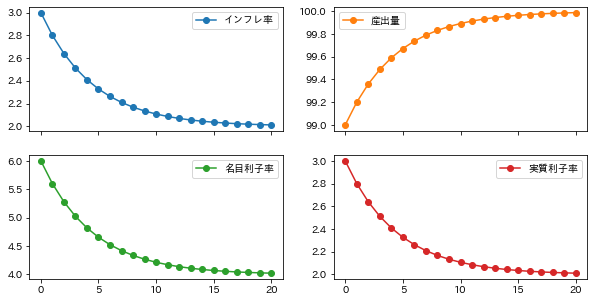

In [13]:
df = ismppc_model(pi0=3.0,y0=99)
df.plot(marker='o', subplots=True, layout=(2,2), figsize=(10,5))
pass

＜初期時点＞
* インフレ率はターゲットを上回っているので中央銀行は名目利子率を高くしようとする。産出は自然率水準を下回っているので名目利子率を低くしよとする。この両方を勘案し名目利子率を決定する。

＜結果＞
* $c>0$なので中央銀行の金融政策によりインフレ率の減少している。
* インフレ率減少に伴って，中央銀行は名目利子率を下げている。
* その結果，実質利子率も減少しており，それが投資を刺激し産出量は増加している。

{numref}`fig:12-ismppc_simulation`が示すように，この過程でISMP曲線とPC曲線は点Bから徐々に点Aに向かって移動することになる。

```{figure} /images/ismppc-simulation.jpeg
---
scale: 35%
name: fig:12-ismppc_simulation
---
IS-MP-PCモデルの移行過程
```

#### シミュレーション２

初期値を次にように設定する。
* $\pi_0=1.5<2.0=\pi^*$
* $y_0=100.5>100=y^*$

固有値		[0.  0.8]


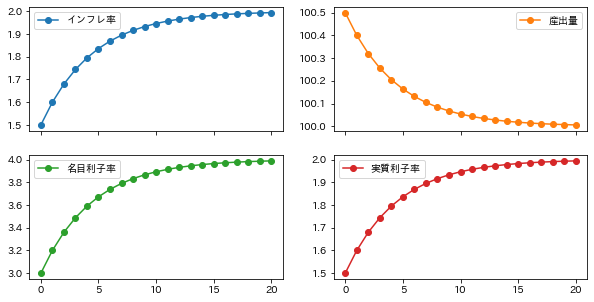

In [29]:
df = ismppc_model(pi0=1.5,y0=100.5)
df.plot(marker='o', subplots=True, layout=(2,2), figsize=(10,5))
pass

＜初期時点＞
* インフレ率はターゲットを下回っているので中央銀行は名目利子率を低くしようとする。産出は自然率水準を上回っているので名目利子率を高くしよとする。この両方を勘案し名目利子率を決定する。

＜結果＞
* $c>0$なので中央銀行の金融政策によりインフレ率の上昇している。
* インフレ率上昇に伴って，中央銀行は名目利子率を上げている。
* その結果，実質利子率も上昇しており，それが投資需要を抑え産出量は減少している。

{numref}`fig:12-ismppc_simulation`では，この過程でISMP曲線とPC曲線は点Cから徐々に点Aに向かって移動することになる。

＜練習問題＞
* $c$の値を変えて移行過程の違いを検討しなさい。その要因は何かを考えよう。
* $d$の値を変えて移行過程の違いを検討しなさい。その要因は何かを考えよう。

### インパルス反応

#### 準備

ここではインパルス反応を使いショックの効果を考える。以前と同じように$u_t$、$v_t$、$e_t$の内１つのショックが１期だけ発生する場合の効果を考える。

In [17]:
def ismppc_impulse(a=1.0,b=0.25,c=1.5,d=0.5,shock_is=0,shock_mp=0,shock_pc=0,n=20):
    """引数：
            a：IS曲線のパラメータ（利子率の乖離）
            b：フィリップス曲線のパラメータ（GDPギャップ）
            c：MP曲線のパラメータ（インフレ率の乖離）
            d：MP曲線のパラメータ（GDPギャップ）
            shock_is：IS曲線のショック
            shock_mp：MP曲線のショック
            shock_pc：フィリップス曲線のショック
            n：ショック発生後のシミュレーションの回数
       返り値：
           インフレ率，産出量，名目利子率，実質利子率からなるDataFrame
           
       * piとyの初期値は定常値に設定してある。
       * ショックは３期目に発生する。"""
    
    # ========== 定常状態 ==========    
    y_ss = 100       # y*
    pi_ss = 2        # pi*
    r_ss = 2         # r*
    
    # ========== 結果を格納するリストの作成 ==========
    y_list = [y_ss]*3        # 最初の３つの要素は定常状態に設定
    pi_list = [pi_ss]*3
    i_list = [pi_ss+r_ss]*3
    r_list = [r_ss]*3
    
    # ========== forループのアップデート用変数 ==========
    y = y_ss     # 最初はy_ssに設定
    pi = pi_ss   # 最初はpi_ssに設定
    
    # ========== モデルの行列 ==========
    gamma = 1+a*d
    A = np.array([[gamma,a*c],
                  [-b,1]])
    B = np.array([[0,0],
                  [0,1]])
    invA = inv(A)
    
    # ========== ショック発生時 ==========
    # ショックが含まれるC
    C = np.array([gamma*y_ss+a*c*pi_ss + shock_is - a*shock_mp,
                  -b*y_ss + shock_pc])

    X = np.array([y,pi])    # 前期のX（式X）
    X = invA@B@X + invA@C   # 今期のXの計算（式１）
        
    y = X[0]     # アップデート用のyを書き換え、次のループの「前期のy」として使う
    pi = X[1]    # アップデート用のpiを書き換え、次のループの「前期のpi」として使う
    i = r_ss+pi+c*(pi-pi_ss)+d*(y-y_ss)
    r = i-pi
    
    y_list.append(y)
    pi_list.append(pi)
    i_list.append(i)
    r_list.append(r)
    
    # ========== ショック後 ==========
    C = np.array([gamma*y_ss+a*c*pi_ss,   # ショックは全て０にリセット
                  -b*y_ss])
    
    for j in range(n):

        X = np.array([y,pi])     # アップデート用変数を使い前期のXを設定
        
        X = invA@B@X + invA@C    # 今期のXを計算
        
        y = X[0]    # アップデート用のyを書き換え、次のループの「前期のy」として使う
        pi = X[1]   # アップデート用のpiを書き換え、次のループの「前期のpi」として使う
        i=r_ss+pi+c*(pi-pi_ss)+d*(y-y_ss)
        
        y_list.append(y)
        pi_list.append(pi)
        i_list.append(i)
        r_list.append(i-pi)

    # DataFrameの作成
    dic = {'インフレ率':pi_list, '産出量':y_list,
           '名目利子率':i_list, '実質利子率':r_list}
    df = pd.DataFrame(dic)
    
    return df

#### PC曲線へのショック

* PC曲線へのショック
    * $e_t$の変化

        $$
        e_{t}=
        \begin{cases}
        1&\text{if }t=3 \\
        0&\text{if }t\ne 3
        \end{cases}
        $$
    
    * $\pi_t$の1%の上昇
    
* 供給ショック
    * 例えば、期待インフレ率の上昇や生産性減少

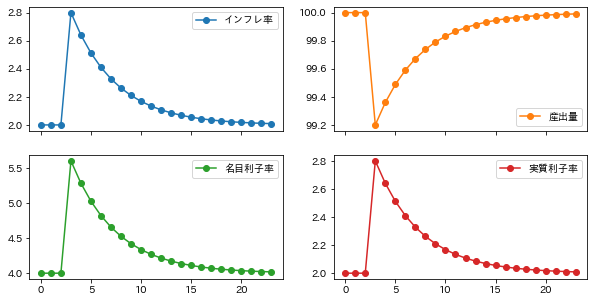

In [15]:
df_res = ismppc_impulse(shock_pc=1)
df_res.plot(marker='o', subplots=True, layout=(2,2), figsize=(10,5))
pass

{numref}`fig:12-pc_shock`を使って説明しよう。
* $t=2$期以前は定常状態である点Aに経済は位置する。
* $t=3$期にフィリップス曲線への予期しないショックが発生し，PC曲線が上方シフトする（①）。経済は点Bにジャンプする。
    * インフレ率は上昇し産出は減少する。
    * これらに反応して中央銀行は名目利子率を上げる。中央銀行にとってGDPギャップの減少により利子率を下落させる誘因もあるが、名目利子率の上昇によるインフレのコントロールが優先されている。
    * 名目利子率変化はインフレ率の変化を上回り実質利子率は上昇する。その結果，投資需要が減少し産出も減少する。
* $t=4$期では，ショックはゼロになる。しかしPC曲線は元の位置にすぐには戻らない。その理由は，$\pi_3$が高かったため$\pi_4$も高い傾向にある。従って，インフレ率は少ししか減少しない。それに応じて，中央銀行も高い名目利子率を維持し，実質利子率も高い水準のままである。その結果GDPギャップも少ししか縮小しない。
* $t=5$期以降，PC曲線が徐々に下方シフトし，経済はISMP曲線に沿って点Aに向かって動いていく（②）。
    * $c>0$が成立しているため，インフレ率は徐々に減少する。それに伴い中央銀行も名目利子率減少させる。実質利子率も減少し，徐々に投資需要と産出も増加する。

```{figure} /images/pc_shock.jpeg
---
scale: 30%
name: fig:12-pc_shock
---
フィリップス曲線へのショックの効果
```

#### IS曲線へのショック

* IS曲線へのショック
    * $y_t$へのショック
    
        $$
        u_{t}=
        \begin{cases}
        1&\text{if }t=3 \\
        0&\text{if }t\ne 3
        \end{cases}
        $$
    
    * 産出の自然産出水準からの1％乖離

* 需要ショック（例：外生的な理由による消費や投資の増加）

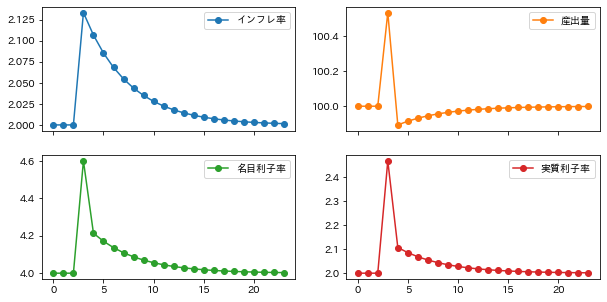

In [43]:
df_res = ismppc_impulse(shock_is=1.)
df_res.plot(marker='o', subplots=True, layout=(2,2), figsize=(10,5))
pass

{numref}`fig:12-is_shock`を使って説明しよう。
* $t=2$期以前は定常状態である点Aに経済は位置する。
* $t=3$期にIS曲線への予期しないショックが発生し，ISMP曲線が右シフトする（①）。経済は点Bにジャンプする。
    * インフレ率と産出はともに上昇する。
    * これらに反応して中央銀行は名目利子率を上げる。
    * 名目利子率変化はインフレ率の変化を上回り実質利子率は上昇する。その結果，間接的な効果として投資需要が減少し産出も減少するが。しかしショックの直接的な効果が勝るため産出は大きくジャンプしている。
* $t=4$期では，ショックはゼロになり，ISMP曲線は元の位置に戻る（②）。一方，$\pi_3$が高かったため，その影響によりPC曲線は上方シフトする（③）。経済は点Cにジャンプする。インフレ率は減少するが高止まりする一方，産出は自然率水準を下回る。これにより，中央銀行は名目利子率を大きく下げることになり，実質利子率も大きく下落する。
* $t=5$期以降，PC曲線が徐々に下方シフトし，経済はISMP曲線に沿って点Aに向かって動いていく（④）。
    * $c>0$が成立しているため，インフレ率は徐々に減少する。それに伴い中央銀行も名目利子率減少させる。実質利子率も減少し，徐々に投資需要と産出も増加する。

```{figure} /images/is_shock.jpeg
---
scale: 30%
name: fig:12-is_shock
---
IS曲線へのショックの効果
```

#### MP曲線へのショック

* MP曲線へのショック
    * $i_t$へのショック
    
        $$
        v_{t}=
        \begin{cases}
        1&\text{if }t=3 \\
        0&\text{if }t\ne 3
        \end{cases}
        $$
    
* 事前アナウンスなしの1％利子率上昇

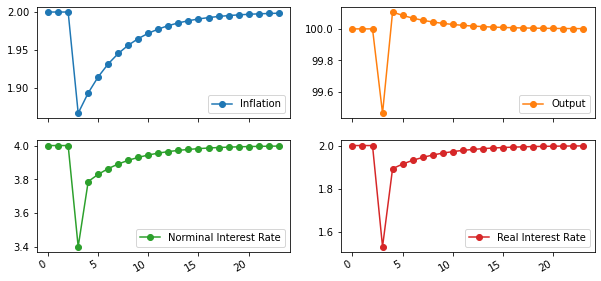

In [68]:
df_res = ismppc_impulse(shock_mp=1.)
df_res.plot(marker='o', subplots=True, layout=(2,2), figsize=(10,5))
pass

{numref}`fig:12-mp_shock`を使って説明しよう。
* $t=2$期以前は定常状態である点Aに経済は位置する。
* $t=3$期にMP曲線への予期しないショックが発生し，ISMP曲線が左シフトする（①）。経済は点Bにジャンプする。
    * インフレ率と産出はともに減少する。
    * これらに反応して中央銀行は名目利子率を下げる。
    * 名目利子率変化はインフレ率の変化を上回り実質利子率も下落する。その結果，間接的な効果として投資需要と産出も増加するが。しかしショックの直接的な効果が勝るため産出は大きく下方ジャンプしている。
* $t=4$期では，ショックはゼロになり，ISMP曲線は元の位置に戻る（②）。一方，$\pi_3$が低かったため，その影響によりPC曲線は下方シフトする（③）。経済は点Cにジャンプする。インフレ率は上昇するが低いままである一方，産出は自然率水準を上回る。これにより，中央銀行は名目利子率を大きく上げることになるが，低いインフレ率を考慮し名目利子率の上げ具合を調整している。実質利子率も大きく変化している。
* $t=5$期以降，PC曲線が徐々に上方シフトし，経済はISMP曲線に沿って点Aに向かって動いていく（④）。
    * $c>0$が成立しているため，インフレ率は徐々に上昇する。それに伴い中央銀行も名目利子率を上昇させる。実質利子率も上昇し，徐々に投資需要と産出も減少しながら定常状態に移行していく。

```{figure} /images/mp_shock.jpeg
---
scale: 30%
name: fig:12-mp_shock
---
MP曲線へのショックの効果
```

### 金融政策のスタンス

中央銀行の政策スタンスはMP曲線の$c$と$d$が反映している。$c$の値が高ければ，インフレ率の乖離により積極的に反応する。同様に，$d$の値が高い場合，GDPギャップ重要視される。では$c$と$d$の値の違いによって経済のダイナミックな反応はどう違って来るのだろうか。この問題を検討するために，次の２つのケースを考える。
1. $c=1.5$，$d=0.5$：インフレ率の乖離がより重要
1. $c=0.5$，$d=1.5$：産出量の乖離がより重要

上で考えたシミュレーションは1のケースであるが，違いはISMP曲線の傾きに現れる。このことは式ISMP曲線を微分すると簡単に確認できる。

$$
\frac{\partial\pi_t}{\partial y_t}=\frac{1+ad}{ac}=
\begin{cases}
-1&\text{(ケース１)}\\
-5&\text{(ケース２)}
\end{cases}
$$

この２つのケースの違いを考えるために，PC曲線へのショックを考えよう。{numref}`fig:12-two_cases`からショックが発生した期のインパクト効果の違いが確認できる。

```{figure} /images/two_cases.jpeg
---
scale: 30%
name: fig:12-two_cases
---
中央銀行の政策スタンスの違い
```

しかし{numref}`fig:12-two_cases`からは，インパクト後の変数の推移はどのように異なるかは明確ではない。シミュレーションで確認しよう。まず２つのケースを計算する。

In [90]:
df_res_1 = ismppc_impulse(c=1.5, d=0.5, shock_pc=1.)
df_res_2 = ismppc_impulse(c=0.5, d=1.5, shock_pc=1.)

次にプロットする。

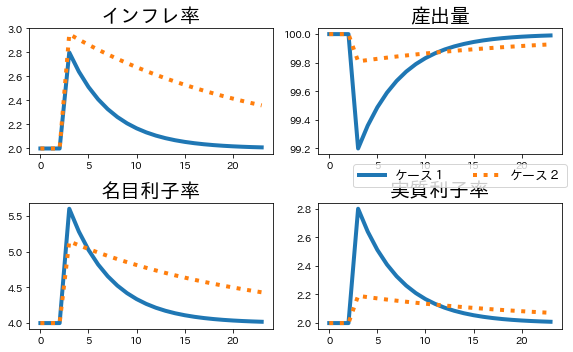

In [125]:
fig, ax = plt.subplots(2, 2,                 # 1
                       figsize=(8,5),        # 2
               
                       tight_layout=True)    # 3

                                             # 4
ax[0,0].plot('インフレ率', data=df_res_1, linewidth=4)
ax[0,0].plot('インフレ率', data=df_res_2, linewidth=4, linestyle=':')
ax[0,0].set_title('インフレ率',size=20)
                                             # 5
ax[0,1].plot('産出量', data=df_res_1, linewidth=4)
ax[0,1].plot('産出量', data=df_res_2, linewidth=4, linestyle=':')
ax[0,1].set_title('産出量',size=20)
                                             # 6
ax[1,0].plot('名目利子率', data=df_res_1, linewidth=4)
ax[1,0].plot('名目利子率', data=df_res_2, linewidth=4, linestyle=':')
ax[1,0].set_title('名目利子率',size=20)
                                             # 7
ax[1,1].plot('実質利子率', data=df_res_1, linewidth=4)
ax[1,1].plot('実質利子率', data=df_res_2, linewidth=4, linestyle=':')
ax[1,1].set_title('実質利子率',size=20)

fig.legend(['ケース１','ケース２'],             # 8
           fontsize=13,                      # 9
           ncol=2,                           # 10
           loc=7)
#            bbox_to_anchor=(0.7, 1.1))        # 11
pass

````{admonition} コードの説明
:class: dropdown

1. 引数として`2`，`2`を使っているので（最初の`2`は行数，次の`2`は列数），4つの「軸」があり`Numpy`の`array`として次のように格納される。
    ```
    array([[軸１,軸２],
           [軸３,軸４]])
    ```
    この`array`が`ax`に割り当てられている。軸１にアクセスするには`ax[0,0]`，軸２には`ax[0,1]`，軸３には`ax[1,0]`，軸４には`ax[1,1]`とする。この方法で(4)-(7)では`ax`の「軸」にアクセスしている
2. キャンバスの大きさを設定している。
3. 「軸」間の感覚の調整（ない場合どうなるか試してみよう）。
4. 左上の図
    * `ax[0,0]`で「軸１」にアクセスして，メソッド`.plot()`でプロットする。
        * `linewidth=4`は線の太さの設定している。
        * `linestyle=':'`は点線に指定している。
    * `.set_title()`は軸のタイトルの設定。
        * `size=20`はタイトルの文字サイズの設定。
5. 右上の図
    * `ax[0,1]`で「軸２」にアクセスして，メソッド`.plot()`でプロットする。
    * 後は(4)と同じ
6. 左下の図
    * `ax[1,0]`で「軸３」にアクセスして，メソッド`.plot()`でプロットする。
    * 後は(4)と同じ
7. 左下の図
    * `ax[1,1]`で「軸４」にアクセスして，メソッド`.plot()`でプロットする。
    * 後は(4)と同じ
8. キャンバスが割り当てられている`fig`に`.legen()`を使い凡例を設定する。
9. 凡例の文字サイズの大きさの設定。
10. 凡例を２列にする。デフォルトでは`ncol=1`。
11. `bbox_to_anchor=(0.7, 1.1)`は凡例の位置を設定する。`0.7`は横軸の値，`1.1`は縦軸の値。色々な数字（例えば，`(0,0)`や`(1,1)`を試してみよう。 
````

ケース１と比べてケース２は，インフレ率よりも産出量の乖離をより重要視する政策スタンスである。実際，産出量の乖離は非常に小さく抑えられている。一方で，インパクト時のインフレ率は高くなっているだけではなく，インフレ率の減少は緩やかであり，より長い期間にかけて目標インフレ率を上回っている。これらの理由は，ケース２で中央銀行は名目利子率が低く抑えているためである。低利子率政策により実質利子率の上昇が低く抑えられ産出量の減少は小さくなる一方，インフレ率の上昇を許していることになる。この結果は，産出量とインフレ率の乖離にトレード・オフが存在し，金融政策のスタンスはインパクト時だけではなく，ある程度長い時間にかけて影響が続くことを示している。

## IS-MP-PSモデルの問題点

第一に，フィシャー方程式[](eq:12-fisher)には$\text{E}_t\pi_{t+1}$があり一見フォーワード・ルッキング（将来を見据えた行動）に見えるが，モデルの解はバックワード・ルッキング（後ろ向き）な行動に基づいたモデルとなっている。モデルの解として次の式を導出した（再掲）。

$$
y_{t+1}=y^* +
    \frac{ac}{1+ad}
    \left(\pi^*-\pi_{t+1}
    \right)
    \qquad\text{(ISMP)}
$$

$$
\pi_{t+1}=\pi_{t}+b(y_{t+1}-y^*)\qquad\text{(PC)}
$$

ここでは$u_{t+1}=v_{t+1}=e_{t+1}=0$としている。重要な点は、今期の$\pi_{t}$さえ分かれば来期のの$\pi_{t+1}$と$y_{t+1}$は簡単に予測できるという特徴である。モデルの係数が決定され今期のインフレ率さえ分かれば、全ての変数は予測可能ということになる。

この特徴を踏まえて，次のシナリオを考えてみよう。$t$期に中央銀行が名目利子率を$t+2$期に減少させるとアナウンスしたとする。実際経済では，企業・消費者が将来の効果を織り込んで行動することにより，マクロ変数も変化することになる。即ち，フォーワード・ルッキングな行動により，マクロ的な変化が現れることになる。一方，IS-MP-PCモデルではそうならない。係数は固定されており，式に沿った変化しか現れない。この理由は，適応的期待に特徴付けられるバックワード・ルッキングな行動に基づいているためである。ショック項をゼロとしているが、ランダムなショックを導入しても同じ問題が存在する。この点を克服するためには，企業・消費者の将来を見据えた最適化行動に基づいたモデルが必要になる。

第二の問題は最初の問題と密接に関連している。上のモデルはルーカス批判と言われる問題に対応できていない。ある経済モデルをデータを使い係数を推定し，それを使って政策変更の効果を考えるとしよう。その場合に使う係数の値は政策変更前の行動に基づいてるが，政策が変更されると企業・消費者は行動を変えるだろう。従って，元々のモデルで政策変更の効果を予測しても意味のないものになりかねない。この問題を回避するためには、モデル自体が企業・消費者の最適化行動（利潤最大化・効用最大化）に基づいていなければならない。IS-MP-PCモデルは，企業・消費者の最適化行動に基づいていないので，ルーカス批判に対応できていない。

この２つの問題を克服するためには、将来を見据えた消費者と企業の最適化行動を導入する必要がある。それがニューケインジアン・モデルと呼ばれるものである。ニューケインジアン・モデルには最適化問題と合理的期待が含まれ複雑である。段階的に説明するために，シミュレーションに必要なツールを紹介し，またニューケインジアン・モデルの土台となった実物的景気循環モデルについて紹介することにする。